In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime


In [2]:
df = pd.DataFrame([
    ['jan/16', 0.0114], 
    ['fev/16', 0.0129], 
    ['mar/16', 0.0051], 
    ['abr/16', 0.0033], 
    ['mai/16', 0.0082], 
    ['jun/16', 0.0169], 
    ['jul/16', 0.0018], 
    ['ago/16', 0.0015], 
    ['set/16', 0.0020], 
    ['out/16', 0.0016], 
    ['nov/16', -0.0003], 
    ['dez/16', 0.0054], 
], columns=['date', 'value'])

In [5]:
df

,date,value
0,jan/16,0.0114
1,fev/16,0.0129
2,mar/16,0.0051
3,abr/16,0.0033
4,mai/16,0.0082
5,jun/16,0.0169
6,jul/16,0.0018
7,ago/16,0.0015
8,set/16,0.0020
9,out/16,0.0016


In [3]:
igpm = (1+df.value).cumprod()

In [12]:
igpm

0     1.011400
1     1.024447
2     1.029672
3     1.033070
4     1.041541
5     1.059143
6     1.061049
7     1.062641
8     1.064766
9     1.066470
10    1.066150
11    1.071907
Name: value, dtype: float64

In [13]:
igpm[-1:]

11    1.071907
Name: value, dtype: float64

In [11]:
igpm[-1:].iloc[0]

1.0719070750962767

In [4]:
(igpm[-1:].iloc[0] -1) * 100

7.1907075096276696

In [190]:
igp=pd.read_csv('igp.csv', dtype={'Data': str})

In [191]:
igp = igp[['Data', 'Inflação - IGP-M - (% a.m.) - Fundação Getulio Vargas']]

In [192]:
igp = igp.rename(columns={'Inflação - IGP-M - (% a.m.) - Fundação Getulio Vargas': 'value'})

In [194]:
igp['Data'] = pd.to_datetime(igp.Data, format='%Y.%m')

In [197]:
igp = igp.sort_values(by='Data')

In [198]:
igp = igp.set_index('Data')

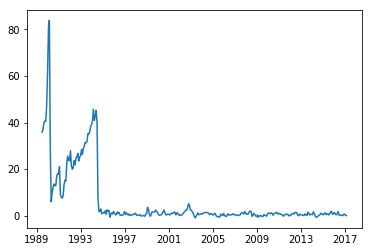

In [199]:
plt.plot(igp.index, igp['value'])

In [200]:
igp['value_atual']= igp['value']/100

In [201]:
igp = igp[['value_atual']]
igp.columns=['value']

In [202]:
igp.tail()

,value
Data,
2016-11-01,-0.0003
2016-12-01,0.0054
2017-01-01,0.0064
2017-02-01,0.0008
2017-03-01,0.0001


In [203]:
igp_acumulado = (1+igp.value).cumprod()

In [204]:
(igp_acumulado[-1:].iloc[0] -1) * 100

2158750245.7589383

In [205]:
igp.dtypes

value    float64
dtype: object

In [206]:
#igp.loc[-1]

In [207]:
igp['2010-02':'2016-11']

,value
Data,
2010-02-01,0.0118
2010-03-01,0.0094
2010-04-01,0.0077
2010-05-01,0.0119
2010-06-01,0.0085
2010-07-01,0.0015
2010-08-01,0.0077
2010-09-01,0.0115
2010-10-01,0.0101


In [208]:
#se eu peguei 100 emprestados em fev/2010 e devolvi em nov/2016, quanto eu pago?
emprestado = igp.iloc[247:329]
#emprestado = igp.iloc['2010.02':'2016.11',0]

In [209]:
emprestado

,value
Data,
2010-02-01,0.0118
2010-03-01,0.0094
2010-04-01,0.0077
2010-05-01,0.0119
2010-06-01,0.0085
2010-07-01,0.0015
2010-08-01,0.0077
2010-09-01,0.0115
2010-10-01,0.0101


In [210]:
dinheiro_a_pagar = (1+emprestado.value).cumprod()

In [211]:
(dinheiro_a_pagar[-1:].iloc[0])*100

161.62182854160443

In [212]:
#data no formato 'aaaa-mm'
def inflacao(valor, mes1, mes2):
    emprestado = igp[mes1:mes2]
    dinheiro_a_pagar = (1+emprestado.value).cumprod()
    return (dinheiro_a_pagar[-1])*int(valor)

In [215]:
r = inflacao(100,'2010-02','2016-11')

In [216]:
r

161.62182854160443

In [ ]:
http://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/
http://stackoverflow.com/questions/33589691/the-label-1-is-not-in-the-index